<center>
    <h1>TP BDM: Classification d'images avec CNN</h1>
</center>

## 1. Qu'est ce que le deep learning?
Le Deep Learning est un sous-domaine du machine learning qui s'intéresse aux algorithmes inspirés par la structure et la fonction du cerveau appelés **réseaux de neurones artificiels**.  

Deep Learning est une technologie clé derrière les voitures sans conducteur, qui leur permet de reconnaître un panneau d'arrêt ou de distinguer un piéton d'un lampadaire. C'est la clé de la commande vocale dans les appareils grand public comme les téléphones, les tablettes, les télévisions et les haut-parleurs mains libres. Le Deep Learning retient beaucoup d'attention ces derniers temps et pour une bonne raison. Il atteint des résultats qui n'étaient pas possibles auparavant.

Dans le Deep Learning, un modèle apprend à effectuer des tâches de classification directement à partir d'images, de texte ou de son. Ces modèles peuvent atteindre **une précision de pointe**, dépassant parfois les performances au niveau humain. Ces modèles sont entraînés à l'aide d'un grand ensemble de données étiquetées et d'architectures de réseaux de neurones qui contiennent de nombreuses couches.

## 2. Quel est l'objectif de deep learning?
En un mot, **la précision**. Le DL peut atteindre une précision de reconnaissance à des niveaux plus élevés que jamais. Cela permet à l'électronique grand public de répondre aux attentes des utilisateurs, et c'est crucial pour les applications critiques pour la sécurité comme les voitures sans conducteur. Les progrès récents du DL se sont améliorés au point où ce dernier surpasse les humains dans certaines tâches comme la classification d'objets dans des images.

### Deep Learning VS. Machine Learning
Le DL est une forme spécialisée du ML. Un workflow du Machine Learning commence par l'extraction manuelle des fonctionnalités pertinentes à partir des images. Les fonctionnalités sont ensuite utilisées pour créer un modèle qui catégorise les objets dans l'image. Avec un workflow du DL, les fonctionnalités pertinentes sont automatiquement extraites des images. En outre, le Deep Learning effectue un «apprentissage de bout en bout» - où un réseau reçoit des données brutes et une tâche à effectuer, comme la classification, et apprend à le faire automatiquement.
![DL vs ML](./images/DLvML.png)

## 3. Quels sont les types de deep learning?
Le Deep Learning est un domaine en pleine croissance avec des applications qui couvrent un certain nombre de cas d'utilisation. Les différents types de modèles utilisés en Deep Learning sont:
### Les Modèles Supervisés
- Classic Neural Networks (Multilayer Perceptrons)
- Convolutional Neural Networks (CNNs) *(C'est ce que nous allons construire)*
- Recurrent Neural Networks (RNNs)

### Le Modèles non Supervisés
- Self-Organizing Maps (SOMs)
- Boltzmann Machines
- AutoEncoders

## 4. Notre Dataset
Malheureusement, les deux ensembles de données suggérés **Image Segmentation** et **Corel Image Features** n'ont pas pu être utilisés pour implémenter notre modèle CNN, car le modèle précédent prend en entrée des images pixellisées afin d'en extraire des caractéristiques, mais les deux ensembles de données donnant ont des variables vectorisées d'images déjà traitées (les fonctionnalités ont déjà été extraites), pour y faire face, nous avions utilisé l'ensemble de données [CIFAR-10 dataset](https://en.wikipedia.org/wiki/CIFAR-10).

### Description du Dataset
L'ensemble de données **CIFAR-10** contient *60 000* images couleur *32x32* dans *10* classes différentes. Les 10 classes différentes représentent les *avions, les voitures, les oiseaux, les chats, les cerfs, les chiens, les grenouilles, les chevaux, les navires et les camions*. Il y a *6000* images de chaque classe.

## 5. Implementation du CNN
L'un des types les plus populaires de réseaux de neurones profonds est connu sous le nom de **réseaux de neurones convolutionnels (CNN ou ConvNet)**. Un CNN convertit les entités apprises avec des données d'entrée et utilise des couches convolutives 2D, ce qui rend cette architecture bien adaptée au traitement de données 2D, telles que des images.

Les CNN éliminent le besoin d'extraction manuelle des fonctionnalités, vous n'avez donc pas besoin d'identifier les fonctionnalités utilisées pour classer les images. Le CNN fonctionne en extrayant des fonctionnalités directement à partir d'images. Les fonctionnalités pertinentes ne sont pas pré-formées; ils sont appris pendant que le réseau s'entraîne sur une collection d'images. Cette extraction automatisée des fonctionnalités rend les modèles d'apprentissage très précis pour les tâches de vision par ordinateur telles que la classification d'objets.
![CNN](./images/CNN.png)

In [1]:
# créer l'instance Spark
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext(appName="TP_BDM_DL").getOrCreate()

In [2]:
# importer les libraries
import tensorflow.compat.v1 as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version: ',tf.__version__)
print('Utilise le GPU: ',tf.test.is_gpu_available())

TensorFlow version:  2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Utilise le GPU:  False


### Prétraitement des données:
Dans cet exemple nous allons utiliser que 3 classes des dix classes pour ganger du temps d'execution, les classes qu'on vas utiliser sont : **'aeroplane', 'car', 'bird'**.

In [3]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [4]:
# importer le dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, y_train = get_three_classes(X_train, y_train)
X_test, y_test = get_three_classes(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


In [5]:
class_names =['aeroplane', 'car', 'bird']

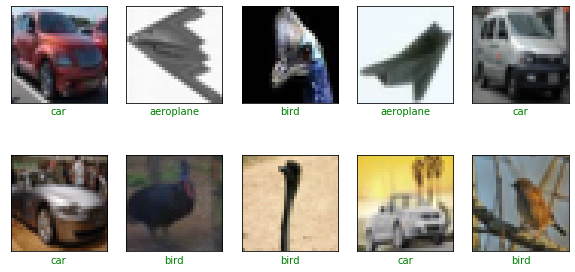

In [6]:
# afficher des images aléatoires
def show_random_example(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10 , replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
    
show_random_example(X_train, y_train, y_train)

### Implementation du Model

In [7]:
from tensorflow.compat.v1.keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.compat.v1.keras.layers import Dropout, Flatten, Input, Dense

In [8]:
def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.Sequential()

    # la couche d'entrée
    model.add(Input(shape=(32, 32, 3)))
    
    # les couches de convolution
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    # aplatir les données
    model.add(Flatten())
    
    # la couche de sortie
    model.add(Dense(3, activation='softmax'))
    
    #compiler le model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [9]:
# créer le model
cnn = create_model()
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

### Phase d'apprentisage

In [10]:
# nous allons garder l'historique d'apprentisage
history = cnn.fit(X_train/255., y_train,
                 validation_data=(X_test/255., y_test),
                 epochs=10, batch_size=128,
                 callbacks=[
                     tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                     tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                       save_best_only=True, save_weights_only=False,
                                                       monitor='val_accuracy')
                 ])

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 115s 8ms/sample - loss: 0.8550 - accuracy: 0.6880 - val_loss: 3.0066 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 108s 7ms/sample - loss: 0.5587 - accuracy: 0.7755 - val_loss: 3.6616 - val_accuracy: 0.3333
Epoch 3/10
15000/15000 [==============================] - 111s 7ms/sample - loss: 0.4911 - accuracy: 0.8058 - val_loss: 2.9633 - val_accuracy: 0.3347
Epoch 4/10
15000/15000 [==============================] - 109s 7ms/sample - loss: 0.4419 - accuracy: 0.8251 - val_loss: 1.8268 - val_accuracy: 0.5067
Epoch 5/10
15000/15000 [==============================] - 110s 7ms/sample - loss: 0.4090 - accuracy: 0.8373 - val_loss: 2.1515 - val_accuracy: 0.4807
Epoch 6/10
15000/15000 [==============================] - 115s 8ms/sample - loss: 0.3736 - accuracy: 0.8533 - val_loss: 0.4027 - val_accuracy: 0.8350
Epoch 7/10
15000/15000 [===========================

D'apres l'historique d'apprentisage, on remarque que le model converge dés le 8ème epoch, avec une `précision: 0.82` et un `loss: 0.48`, ce qui est acceptable pour cet petit dataset. Cependant, nous pouvons les améliorer on augmentons le nombre d'`epochs` sinon on choisissons une plus petite valuer de `batch_size`. 

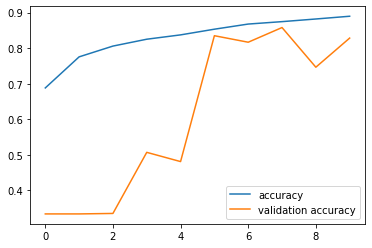

In [13]:
# afficher l'historique d'apprentisage
accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='accuracy')
plt.plot(range(len(val_accs)), val_accs, label='validation accuracy')
plt.legend()
plt.show()

### Predictions
Finalement, pour tester notre model nous allons essayer de péredire la classe de 10 images aléatoires.
Et voila, notre modèle a correctement prédit 9 photos sur 10 (pour être honnête, la première photo ressemble beaucoup plus à un oiseau mais bon).

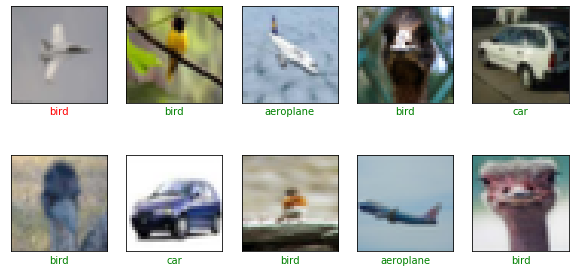

In [14]:
# charger le modèle le plus performant
cnn = tf.keras.models.load_model('models/model_0.858.h5')
preds = cnn.predict(X_test/255.)
show_random_example(X_test, y_test, preds)

## Conclusion
Les réseaux de neurones convolutifs (CNN) ont accompli des réalisations étonnantes dans une variété de domaines, y compris la recherche médicale, et un intérêt croissant est apparu en radiologie. Bien que le Deep Learning soit devenu une méthode dominante dans une variété de tâches complexes telles que la classification d'images et la détection d'objets.